# Keypoint detection, Feature description and matching

In this notebook, I demonstrate how to use OpenCV's feature detection, description and matching framework.

## Package inclusion for Python

In [1]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Open two images

### Left image

![Left image](./_IGP8266.JPG)
    
### Right image

![Right image](./_IGP8267.JPG)    

In [2]:
img1 = cv2.imread("_IGP8266.JPG", cv2.IMREAD_COLOR)
img2 = cv2.imread("_IGP8267.JPG", cv2.IMREAD_COLOR)

### Any error? Is the data loaded?

In [3]:
if img1 is None: 
    raise Exception("Could not open or find the image")
    
if img2 is None: 
    raise Exception("Could not open or find the image")

Text(0.5, 1.0, 'Right Image')

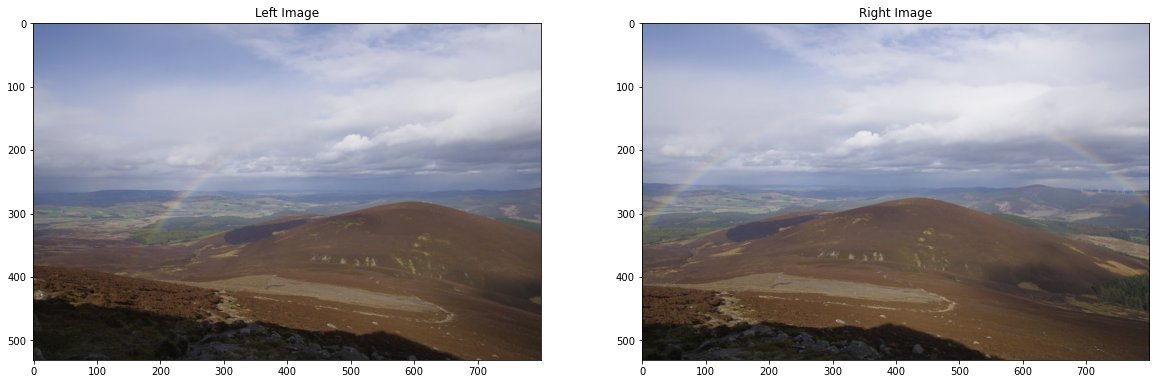

In [4]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
im_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
ax1.imshow(im_rgb)
plt.title("Left Image")

ax2 = fig.add_subplot(1, 2, 2)
im_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
ax2.imshow(im_rgb)
plt.title("Right Image")

## 1. Detect

Create a feature detector, here a ORB feature detector.

In [5]:
detector = cv2.ORB.create()

Detect keypoints in `img1` and `img2`.

In [6]:
keypoints1 = detector.detect(img1)
keypoints2 = detector.detect(img2)

In [7]:
print("Number of keypoints in img1:", len(keypoints1))
print("Number of keypoints in img2:", len(keypoints2))

Number of keypoints in img1: 422
Number of keypoints in img2: 430


Draw where the keypoints are

In [8]:
def drawKeypoints(img, keypoints):

    img_keypoints = np.copy(img)

    for keypoint in keypoints:

        radius = max(1, round(keypoint.size / 20))

        # Random colour in BGR
        colour = np.random.choice(range(256), size=3).tolist()

        # Line thickness of 2 px
        thickness = 2

        # Draw a circle
        img_keypoints = cv2.circle(img_keypoints, (round(keypoint.pt[0]), round(keypoint.pt[1])), radius, colour, thickness)
        
    return img_keypoints

In [9]:
img1_keypoints = drawKeypoints(img1, keypoints1)
img2_keypoints = drawKeypoints(img2, keypoints2)

cv2.imwrite("img1_keypoints.png", img1_keypoints)
cv2.imwrite("img2_keypoints.png", img2_keypoints)

True

Text(0.5, 1.0, 'Right Image and its keypoints')

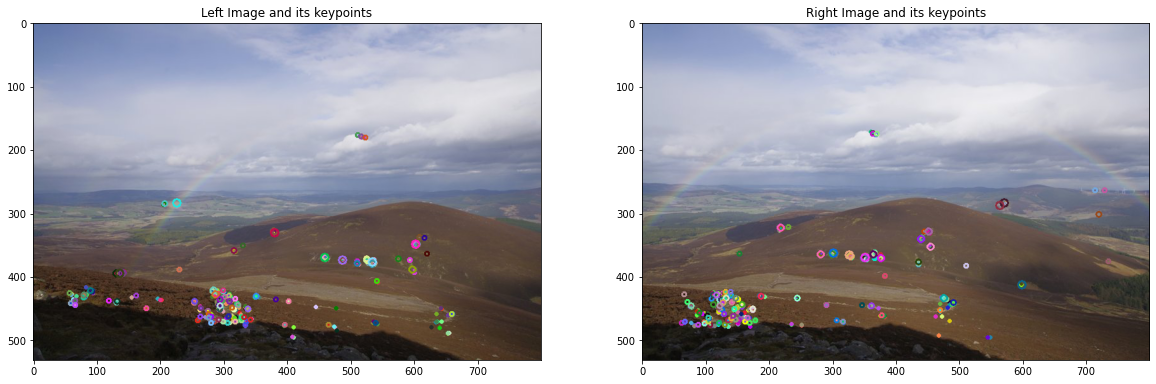

In [10]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
im_rgb = cv2.cvtColor(img1_keypoints, cv2.COLOR_BGR2RGB)
ax1.imshow(im_rgb)
plt.title("Left Image and its keypoints")

ax2 = fig.add_subplot(1, 2, 2)
im_rgb = cv2.cvtColor(img2_keypoints, cv2.COLOR_BGR2RGB)
ax2.imshow(im_rgb)
plt.title("Right Image and its keypoints")

## 2. Describe

Create a feature descriptor, here a ORB feature descriptor

In [11]:
extractor = cv2.ORB.create()

Create the feature vector for the keypoints.

In [12]:
descriptors1 = extractor.compute(img1, keypoints1)
descriptors2 = extractor.compute(img2, keypoints2)

cv2.imwrite("descriptors1.png", descriptors1[1])
cv2.imwrite("descriptors2.png", descriptors2[1])

True

In [13]:
print("Size of  feature descriptors in img1:", descriptors1[1].shape)
print("Size of  feature descriptors in img2:", descriptors2[1].shape)

Size of  feature descriptors in img1: (422, 32)
Size of  feature descriptors in img2: (430, 32)


Text(0.5, 1.0, 'Descriptors of the keypoints of the right image')

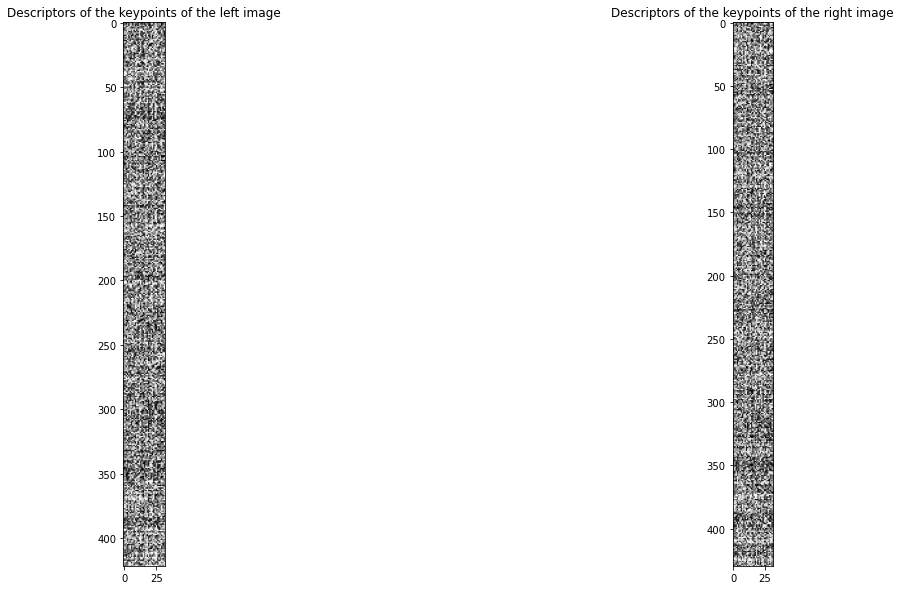

In [14]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(descriptors1[1], cmap="gray")
plt.title("Descriptors of the keypoints of the left image")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(descriptors2[1], cmap="gray")
plt.title("Descriptors of the keypoints of the right image")

## 3. Match

Match keypoints in `img1` and `img2` by comparing their corresponding feature vectors. Here we use a brute-force algorithm and the L2-norm.

In [15]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = matcher.match(descriptors1[1], descriptors2[1])

## 4. Find the good matches

Filter the matches (only keep those with a small distance). 1st find the min and max distances between keypoints

In [16]:
max_dist = -sys.float_info.max
min_dist = sys.float_info.max

for i in range(len(matches)):

    dist = matches[i].distance
    min_dist = min(min_dist, dist)
    max_dist = max(max_dist, dist)

In [17]:
print("Min and max distances between keypoints:", min_dist, max_dist)

Min and max distances between keypoints: 7.0 96.0


Use only "good" matches (i.e. whose distance is less than a threshold, e.g. the middle distance).

In [18]:
def filterMatches(value):

    global min_dist, max_dist
    global matches
    global img_matches
    global img1, keypoints1
    global img2, keypoints2
    
    good_matches = []
    threshold_distance = min_dist + (max_dist - min_dist) * value / 100.0

    for i in range(len(matches)):

        dist = matches[i].distance

        if dist < threshold_distance:
            good_matches.append(matches[i])

    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None)
    cv2.imshow("matches", img_matches)

In [19]:
img_matches = None
threshold_distance = 50

filterMatches(threshold_distance)

## 5. Draw the results

Text(0.5, 1.0, 'Matches')

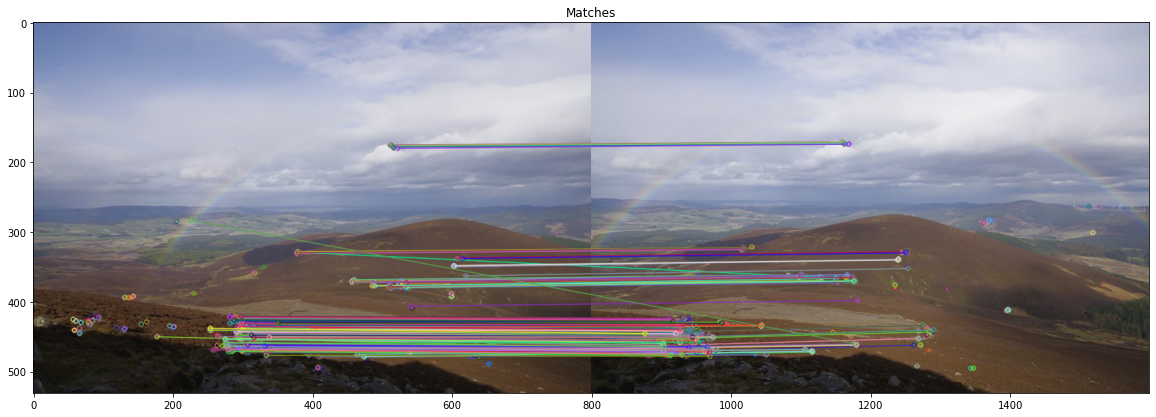

In [20]:
cv2.imwrite("matches.png", img_matches)

fig = plt.figure(figsize=(20, 10))
im_rgb = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.title("Matches")

We could control the threshold using a trackbar.

Create a callback for the trackbar to control the threshold

In [21]:
cv2.imshow("matches", img_matches)
cv2.createTrackbar("Threshold: ", "matches", 50, 100, filterMatches)
cv2.waitKey(0)

[ WARN:0] global /home/conda/feedstock_root/build_artifacts/libopencv_1633800893877/work/modules/highgui/src/window.cpp (703) createTrackbar UI/Trackbar(Threshold: @matches): Using 'value' pointer is unsafe and deprecated. Use NULL as value pointer. To fetch trackbar value setup callback.


27

When we increase the threshold there are wrong matches (called false positives).

![Matches with false positives](match2.png)
    
When we decrease the threshold the false positives disapear as only strong matches remain.

![Strong matches](match3.png)

In [22]:
cv2.destroyAllWindows()